# City Analysis

In [1]:
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from numpy import median
import numpy as np
from datetime import datetime

In [2]:
conn = lite.connect('../src/db/flatmates_data.db')

In [28]:
query = """SELECT *
FROM flatmates_rent_listings 
"""
df = pd.read_sql_query(query,conn)
len(df)

21125

In [29]:
df.head()

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168,0,1,Share House,4,1,4,1644358725
1,P1013697,/share-house-melbourne-richmond-3121-P1013697,Richmond,Melbourne,215,0,1,Share House,4,1,1,1644358725
2,P1155538,/share-house-melbourne-heidelberg-heights-3081...,Heidelberg Heights,Melbourne,163,0,1,Share House,4,3,4,1644358725
3,P1018684,/share-house-melbourne-hawthorn-3122-P1018684,Hawthorn,Melbourne,207,0,1,Flatshare,2,1,2,1644358725
4,P1040979,/share-house-melbourne-bundoora-3083-P1040979,Bundoora,Melbourne,220,0,1,Share House,3,3,3,1644358725


In [30]:
df['city'] = df.apply(lambda x: x['city'].strip(),axis=1)

In [31]:
cities = ["Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "Canberra","Hobart","Darwin"]
df = df[df['city'].isin(cities)]
df['city'].unique()

array(['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Adelaide', 'Canberra',
       'Hobart', 'Darwin'], dtype=object)

In [32]:
df['date'] = df.apply(lambda x: datetime.fromtimestamp(int(x['date'])).strftime('%d-%m-%Y')
         if '-' not in str(x['date']) else x['date']
         ,axis=1)

In [33]:
df

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168,0,1,Share House,4,1,4,09-02-2022
1,P1013697,/share-house-melbourne-richmond-3121-P1013697,Richmond,Melbourne,215,0,1,Share House,4,1,1,09-02-2022
2,P1155538,/share-house-melbourne-heidelberg-heights-3081...,Heidelberg Heights,Melbourne,163,0,1,Share House,4,3,4,09-02-2022
3,P1018684,/share-house-melbourne-hawthorn-3122-P1018684,Hawthorn,Melbourne,207,0,1,Flatshare,2,1,2,09-02-2022
4,P1040979,/share-house-melbourne-bundoora-3083-P1040979,Bundoora,Melbourne,220,0,1,Share House,3,3,3,09-02-2022
...,...,...,...,...,...,...,...,...,...,...,...,...
21119,P1196885,/share-house-darwin-gunn-0832-P1196885,Gunn,Darwin,200,False,2,Share House,5,2,2,04-06-2022
21120,P1196878,/share-house-darwin-darwin-city-0800-P1196878,Darwin City,Darwin,300,False,1,Flatshare,3,2,1,04-06-2022
21121,P1082573,/share-house-darwin-wagaman-0810-P1082573,Wagaman,Darwin,210,False,1,Share House,4,3,3,04-06-2022
21122,P443982,/share-house-darwin-muirhead-0810-P443982,Muirhead,Darwin,345,True,1,Share House,3,2,3,04-06-2022


In [34]:
df['date'] = pd.to_datetime(df['date'],format='%d-%m-%Y')
df.sort_values(by='date')

,flatmates_id,url,suburb,city,price,price_includes_bills,rooms_available,house_type,bedroom_count,bathroom_count,people_count,date
0,P156244,/share-house-melbourne-burwood-3125-P156244,Burwood,Melbourne,168,0,1,Share House,4,1,4,2022-02-09
78,P896637,/share-house-melbourne-burwood-3125-P896637,Burwood,Melbourne,160,1,2,Share House,6,2,6,2022-02-09
77,P1145789,/share-house-melbourne-point-cook-3030-P1145789,Point Cook,Melbourne,210,0,1,Share House,4,2,1,2022-02-09
76,P1134350,/share-house-melbourne-berwick-3806-P1134350,Berwick,Melbourne,250,0,1,Share House,4,2,3,2022-02-09
75,P1151468,/share-house-melbourne-berwick-3806-P1151468,Berwick,Melbourne,290,1,1,Share House,4,2,3,2022-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...
20632,P1196577,/share-house-sydney-bronte-2024-P1196577,Bronte,Sydney,565,False,2,Flatshare,2,2,2,2022-06-04
20633,P1196385,/share-house-sydney-zetland-2017-P1196385,Zetland,Sydney,380,True,1,Flatshare,2,1,1,2022-06-04
20635,P1097059,/share-house-melbourne-noble-park-3174-P1097059,Noble Park,Melbourne,250,False,1,Share House,3,2,3,2022-06-04
20637,P1197292,/whole-property-melbourne-3000-P1197292,Melbourne,Melbourne,450,True,2,Whole Property for rent,2,1,0,2022-06-04


In [35]:
df.where(df['date'] >= "2022-05-27").groupby(['date','city']).median()

price  rooms_available  bedroom_count  bathroom_count  \
date       city                                                               
2022-05-28 Adelaide   200.0              1.0            3.0             2.0   
           Brisbane   232.5              1.0            3.0             2.0   
           Canberra   257.5              1.0            3.0             2.0   
           Hobart     189.5              1.0            3.0             1.0   
           Melbourne  225.0              1.0            3.0             2.0   
           Perth      220.0              1.0            3.0             2.0   
           Sydney     300.0              1.0            2.0             2.0   
2022-06-01 Adelaide   210.0              1.0            3.0             2.0   
           Brisbane   240.0              1.0            3.0             2.0   
           Canberra   245.0              1.0            3.0             2.0   
           Darwin     250.0              1.0            3.0             2.0   
           Hobart     228.5              1.0            3.0             1.0   
           Melbourne  220.0              1.0            3.0             2.0   
           Perth      220.0              1.0            3.0             2.0   
           Sydney     300.0              1.0            3.0             2.0   
2022-06-04 Adelaide   195.0              1.0            3.0             1.0   
           Brisbane   250.0              1.0            3.0             2.0   
           Canberra   245.0              1.0            3.0             2.0   
           Darwin     267.5              1.0            3.0             2.0   
           Hobart     225.0              1.0            3.0             1.5   
           Melbourne  225.0              1.0            3.0             2.0   
           Perth      230.0              1.0            3.0             2.0   
           Sydney     300.0              1.0            2.0             2.0   

                      people_count  
date       city                     
2022-05-28 Adelaide            3.0  
           Brisbane            2.0  
           Canberra            2.0  
           Hobart              2.5  
           Melbourne           2.0  
           Perth               2.0  
           Sydney              2.0  
2022-06-01 Adelaide            2.0  
           Brisbane            2.0  
           Canberra            3.0  
           Darwin              2.0  
           Hobart              3.0  
           Melbourne           2.0  
           Perth               2.0  
           Sydney              2.0  
2022-06-04 Adelaide            2.0  
           Brisbane            2.0  
           Canberra            3.0  
           Darwin              2.0  
           Hobart              2.0  
           Melbourne           2.0  
           Perth               2.0  
           Sydney              2.0

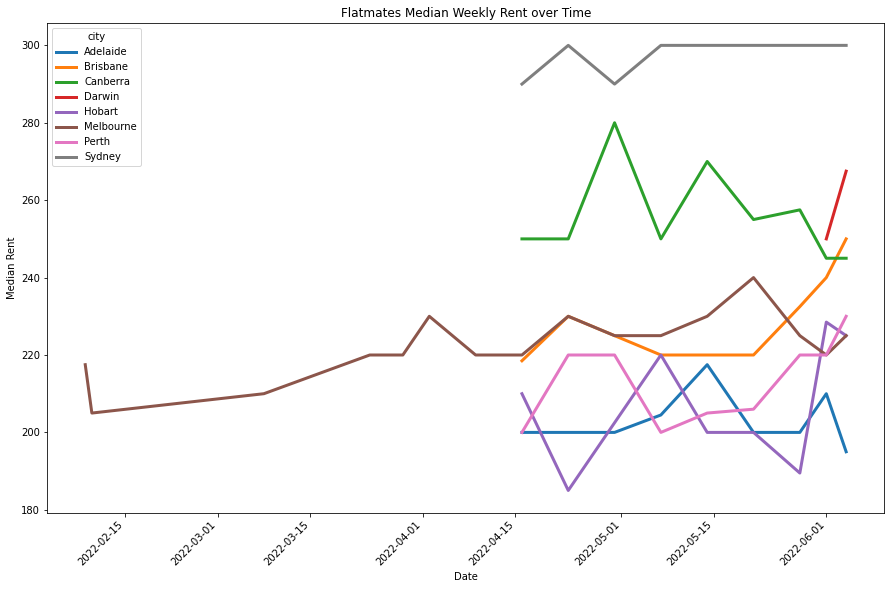

In [36]:
# plt.style.use('fivethirtyeight')

df.groupby(['date','city']) \
    .median()['price'] \
    .unstack() \
    .plot(
    figsize=(15,10),
    linewidth=3)

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Median Rent")
plt.title("Flatmates Median Weekly Rent over Time")
plt.show()

In [39]:
df.groupby(['date','city'])['flatmates_id'].count()

date        city     
2022-02-09  Melbourne     108
2022-02-10  Melbourne     337
2022-03-08  Melbourne    2264
2022-03-24  Melbourne     859
2022-03-29  Melbourne     271
                         ... 
2022-06-04  Darwin         10
            Hobart         16
            Melbourne     174
            Perth          65
            Sydney        248
Name: flatmates_id, Length: 72, dtype: int64

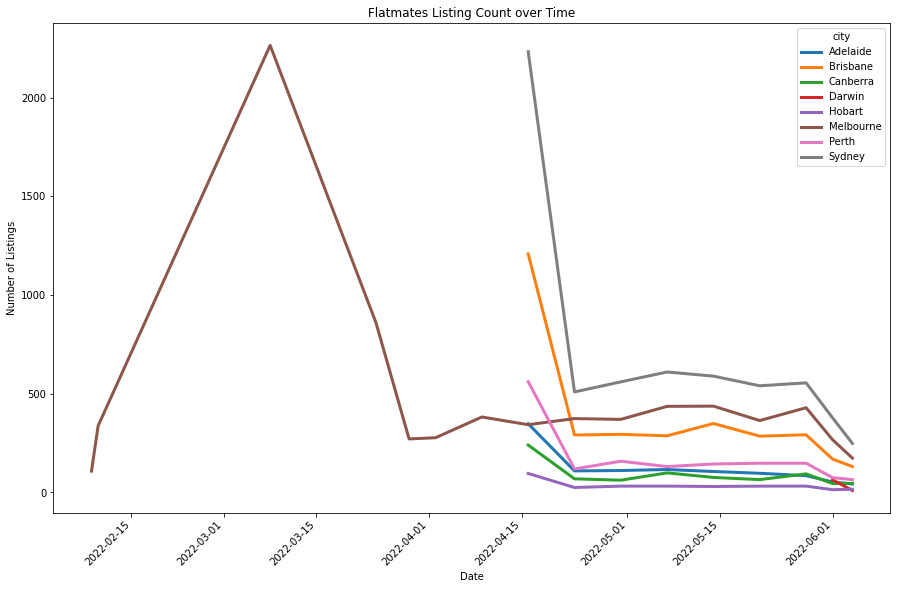

In [41]:
# plt.style.use('fivethirtyeight')

df.groupby(['date','city']) \
    ['flatmates_id'].count() \
    .unstack() \
    .plot(
    figsize=(15,10),
    linewidth=3)

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Listings")
plt.title("Flatmates Listing Count over Time")
plt.show()

In [12]:
city = 'Sydney'

In [13]:
query = """
SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price, date
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
GROUP BY suburb 
HAVING SUM(rooms_available)  > 5
AND average_price < 270
ORDER BY average_price DESC 
LIMIT 50
"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price,date
0,Willoughby,6,267,1650108895
1,South Coogee,19,267,1650107652
2,Asquith,7,267,1650107731
3,Camperdown,45,266,1650107675
4,Rooty Hill,6,264,1650107448
5,Cronulla,49,264,1650107504
6,Artarmon,17,264,1650107595
7,Darlington,12,262,1650107606
8,Drummoyne,32,261,1650107891
9,Redfern,99,260,1650107481


In [14]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
GROUP BY suburb 
HAVING SUM(rooms_available)  > 20
ORDER BY average_price DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,Bondi Beach,166,388
1,North Bondi,66,383
2,Sydney,92,377
3,Mosman,33,370
4,Manly,143,368
5,Freshwater,33,366
6,Bronte,32,358
7,Zetland,76,357
8,Waterloo,72,353
9,Rose Bay,27,352


In [15]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
AND NOT house_type = "Student Accommodation"
GROUP BY suburb 
HAVING SUM(rooms_available)  > 20
ORDER BY rooms_available DESC 
LIMIT 10"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,Randwick,165,288
1,Bondi Beach,165,388
2,Surry Hills,148,304
3,Coogee,146,327
4,Manly,142,367
5,Maroubra,116,294
6,Darlinghurst,110,301
7,Bondi Junction,109,302
8,Parramatta,106,242
9,Newtown,104,259


In [16]:
query = """SELECT suburb, SUM(rooms_available) as rooms_available , SUM(price)/SUM(rooms_available) as average_price
FROM flatmates_rent_listings 
WHERE city like '%""" + city + """%'
GROUP BY suburb 
HAVING SUM(rooms_available)  > 5
ORDER BY average_price  
LIMIT 10
"""
df = pd.read_sql_query(query,conn)
df

,suburb,rooms_available,average_price
0,Milperra,9,48
1,Rydalmere,7,112
2,Padstow,22,120
3,Denistone East,9,126
4,Fairfield,15,129
5,Cherrybrook,8,133
6,Lilyfield,10,133
7,Richmond,10,140
8,Oran Park,15,144
9,Riverstone,17,152
